# Clustering

## K-Means

Cluster labels for k=2: [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1]
Inertia for k=2: 1167.3186348563806
Cluster labels for k=3: [2 0 2 0 2 0 1 2 1 0 2 0 0 0 2 0 0 2 1 0 2 2 0 1 1 1 1 0 2 2 2 2 0 0 2 0 0
 0 2 0 1 1 2 1 2 0 1 2 0 1 0 2 1 1 0 1 1 0 0 0 2 2 1 2 0 2 2 1 0 0 1 0 0 0
 2 2 1 0 0 2 0 1 0 2 0 2 1 1 1 2 2 1 2 0 0 2 1 0 2 1 2 1 1 2 1 1 0 1 1 2 1
 0 0 0 0 2 2 2 1 2 2 0 0 1 1 2 0 2 1 2 1 1 2 2 2 1 1 2 0 2 1 0 2 2 2 1 2 1
 1 1 1 0 2 1 1 1 0 1 1 2 2 1 2 0 1 0 2 0 0 1 2 1 1 0 1 2 0 1 1 2 0 2 1 0 0
 2 2 2 0 1 0 0 1 2 0 0 1 1 0 1]
Inertia for k=3: 374.27021281276365
Cluster labels for k=4: [2 0 2 3 2 0 1 2 1 0 2 0 3 0 2 3 0 2 1 0 2

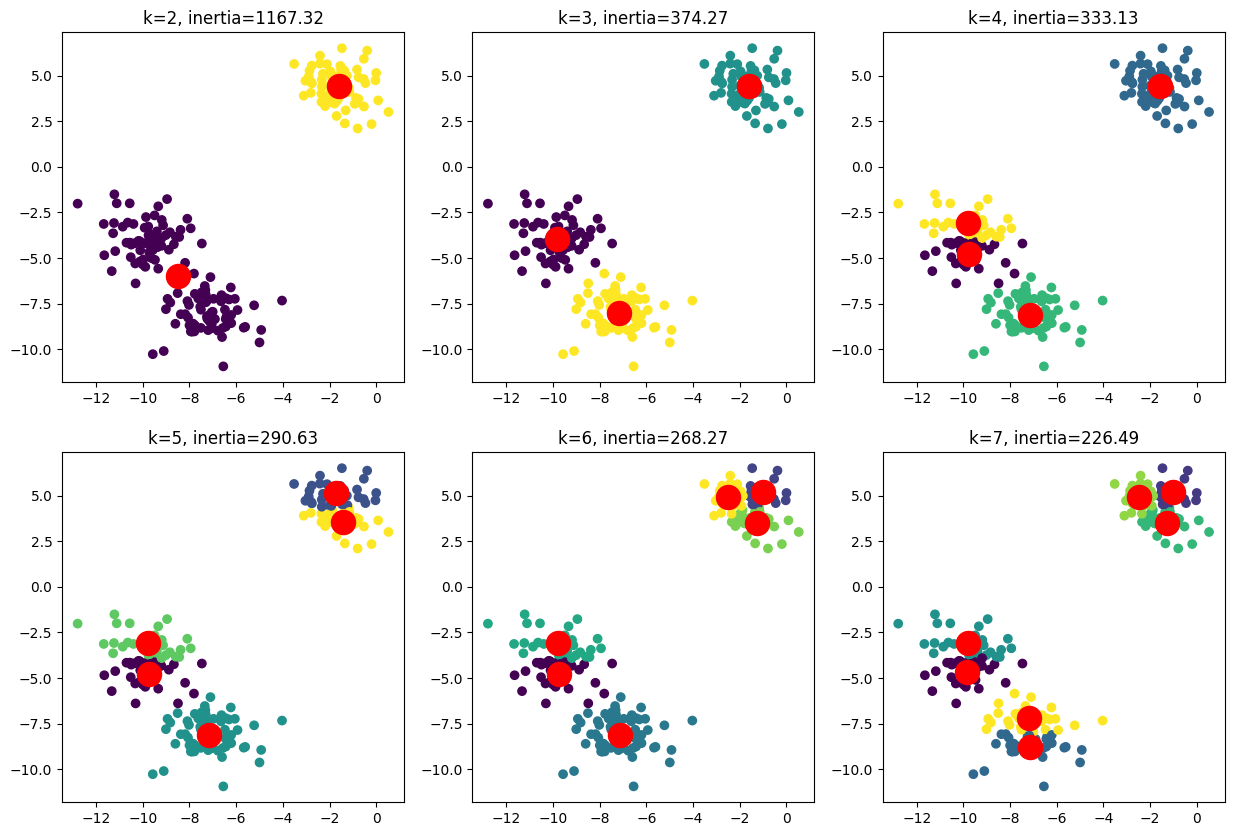

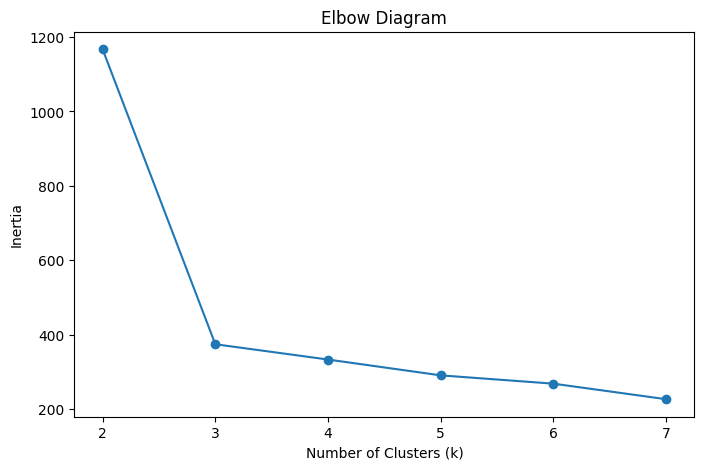

In [16]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create dataset with 3 random cluster centers and 200 samples
X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=1)

# Store the inertias
inertias = []

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, k in enumerate([2, 3, 4, 5, 6, 7], 1):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=1, n_init='auto')

    # Fit model to points
    model.fit(X)

    # Determine the cluster labels of X: labels
    labels = model.predict(X)

    # Print cluster labels of X and inertia
    print(f"Cluster labels for k={k}: {labels}")
    print(f"Inertia for k={k}: {model.inertia_}")

    # Store the inertia
    inertias.append(model.inertia_)

    # Plot the data
    ax = plt.subplot(2, 3, i)
    ax.scatter(X[:,0], X[:,1], c=labels)
    ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=300, c='red')
    ax.set_title(f'k={k}, inertia={model.inertia_:.2f}')

# Plot the elbow diagram
plt.figure(figsize=(8, 5))
plt.plot(range(2, 8), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Diagram')
plt.show()


## Agglomerative Clustering

Cluster labels for k=2: [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1]
Cluster labels for k=3: [0 2 0 2 0 0 1 0 1 2 0 2 2 2 0 2 2 0 1 2 0 0 2 1 1 1 1 2 0 0 0 0 2 2 0 2 2
 2 0 2 1 1 0 1 0 2 1 0 2 1 2 0 1 1 2 1 1 2 2 2 0 0 1 0 2 0 0 1 2 2 1 2 2 2
 0 0 1 2 2 0 2 1 2 0 2 0 1 1 1 0 0 1 0 2 2 0 1 2 0 1 0 1 1 0 1 1 2 1 1 0 1
 2 2 2 2 0 0 0 1 0 0 2 2 1 1 0 2 0 1 0 1 1 0 0 0 1 1 0 2 0 1 2 0 0 0 1 0 1
 1 1 1 2 0 1 1 1 2 1 1 0 0 1 0 2 1 2 0 2 2 1 0 1 1 2 1 0 2 1 1 0 2 0 1 2 2
 0 0 0 2 1 2 2 1 0 2 2 1 1 2 1]
Cluster labels for k=4: [1 2 3 2 1 3 0 3 0 2 1 2 2 2 1 2 2 1 0 2 1 1 2 0 0 0 0 2 1 3 1 3 2 2 3 2 2
 2 1 2 0 0 1 0 1 2 0 1 2 0 2 1 0 0 2 0 

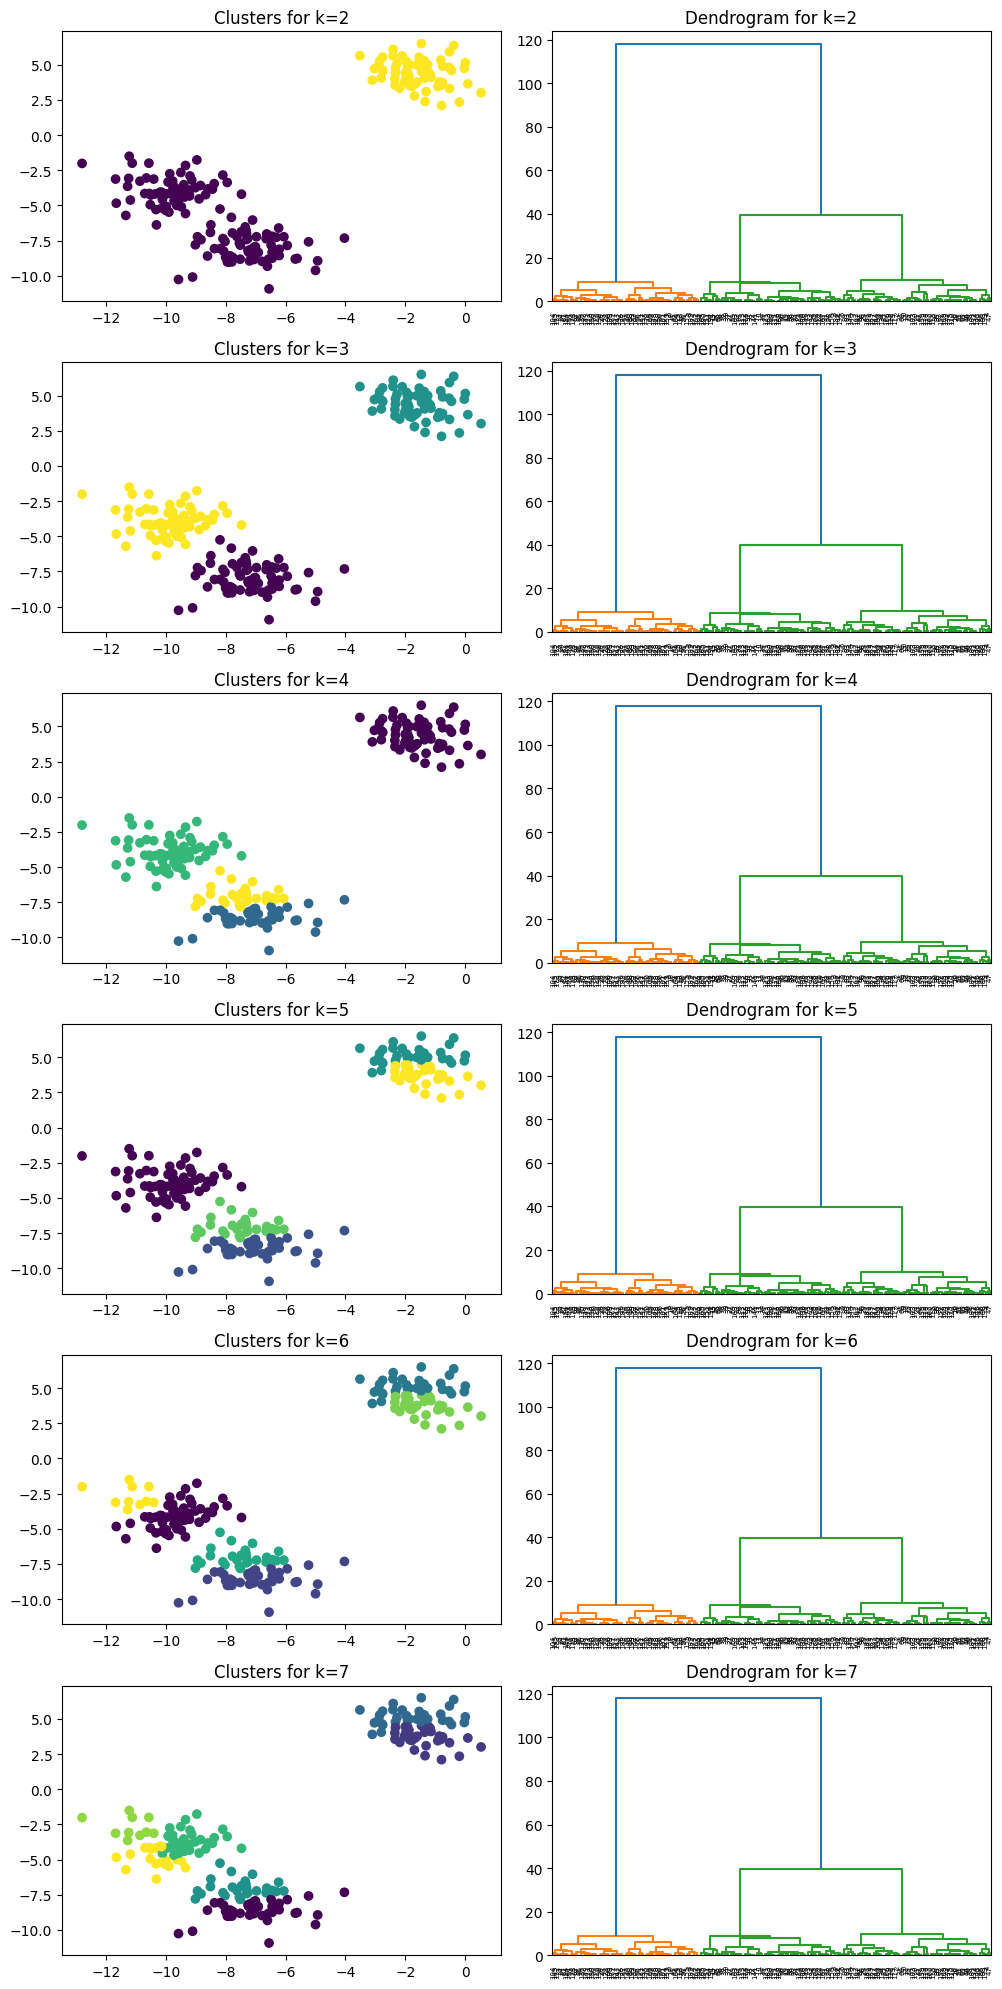

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

# Create dataset with 3 random cluster centers and 200 samples
X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=1)

# Create a function to plot dendrogram
def plot_dendrogram(model, ax, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, ax=ax, **kwargs)

fig, axs = plt.subplots(6, 2, figsize=(10, 20))

for i, k in enumerate([2, 3, 4, 5, 6, 7], 0):
    # Create an AgglomerativeClustering instance with k clusters
    model = AgglomerativeClustering(n_clusters=k)

    # Fit model and predict clusters
    labels = model.fit_predict(X)

    # Print cluster labels of X
    print(f"Cluster labels for k={k}: {labels}")

    # Plot the data
    ax_cluster = axs[i, 0]
    ax_cluster.scatter(X[:,0], X[:,1], c=labels)
    ax_cluster.set_title(f'Clusters for k={k}')

    # Fit the model with distance_threshold=0 and n_clusters=None to build full tree
    model_dendrogram = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model_dendrogram = model_dendrogram.fit(X)

    # Plot the dendrogram
    ax_dendrogram = axs[i, 1]
    plot_dendrogram(model_dendrogram, ax_dendrogram)
    ax_dendrogram.set_title(f'Dendrogram for k={k}')

plt.tight_layout()
plt.show()
